# Bellabeat Analyis | Python & Tableau


This is an individual project does as a capstone to the Google Analytics Professional Certificate.

Introduction


1. Ask | Define Question/Task | Determine Objective
-1.1 About Bellabeat
-1.2 Products
-1.3 Stakeholders
-1.4 Define Objective

2.Prepare | Collect Data | Gather Data | Measure Data
    2.1 Data Used
Data comes from 

ROCCC (Reliable, Original, Comprehensible, Current, Cited)




3.Process | Clean Data | Wrangling/Munging Data

4.Analysis | Analyze Data | Interpreting Data

5.Recommendations | Offer Recommendations | Share Results


## ASK | Define Objective

### About Bellabeat

[**Bellabeat**](https://bellabeat.com/) is a tech-driven wellness company known for designing health-focused smart devices for women. Bellabeat believes its products empower women by allowing them to better understand their bodies and make healthier choices. Their product line-up includes:

- **Leaf**: a wellness tracker that can be worn as a bracelet, necklace, or clip. 
- **Time**: a smart watch in the mold of classic time pieces 
- **Spring**: a smart water bottle tracking daily water intake

All of these smart devices run a software product, **Bellabeat App**, which tracks and offers guidance on users' activity, sleep, stress, menstrual cycle, and mindfulness habits.




[Link image]

### Key Stakeholders

- **Urška Sršen**: Bellabeat's cofounder and Chief Creative Officer
- **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- **Bellabeat Marketing Analytics Team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 


### Business Objective

The CEO would like to understand how current consumers use non-Bellabeat smart devices and then leverage these insights to find opportunities for growth. Additionally, she would like recommendations for a marketing strategy informed by the findings of this analysis.  


## PREPARE | Collect Data

The data used for this analysis is a public domain (CC0 1.0 Universal Public Domain) dataset made available on Kaggle (via user MÖBIUS). It contains   
Data source: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)  

### Data Details
The data uploaded by Kaggle user MÖBIUS originates from respondents to a distributed survey via Amazon Mechanical Turk from March 12 to May 12, 2016. Thirty Fitbit users submitted personal tracker data collected in 18 files covering:
- Physical Activity (measured by Calories, Steps, METs)
- Sleep (measured in minutes)
- Heart Rate (bpm)
- Weight/BMI (lbs)

Data covered a 1-month period of 30 days (04.12.16 - 05.12.16).


This analysis will focus on Physical Activity (daily, hourly), Sleep (daily), and weight/bmi to understand usage at a broader level. 

Weight data only includes 8 individuals and heart rate data is limited to 14. 

### Licensing, Privacy, Security, Integrity
[CC0 1.0 Universal Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
Consent from users
-Users privacy is protected and only identified via randomly generated id numbers
-3rd party

### Data Integrity
- Sample selection bias since, insignificant 
- Variation in output due to different types of Fitbit trackers
- Variation in individual tracking behavior/preferences
- Concerns that there is no demographic data (sex, age, location) 
- Obsolescence - 5 years old




## PROCESS  | Wrangle Data 

Inspect, Wrangle, Validate Data
- Check data type, number of records, number of nulls, stat summary
- addition of columns for easier analysis _by day of week and hour
- We'll look at Physical Activity, Sleep, Weight/BMI

In [148]:
# Import relevant libraries and modules
%load_ext autoreload
%autoreload 2

import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
from functools import reduce

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Activity Data

#### Daily Activity Data

In [10]:
# Load activity data
# Daily Activity Data

path_1 ='../data/dailyActivity_merged.csv'

daily_activity = pd.read_csv(path_1).copy()
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

We have 940 rows of data with no null values. Activity is categorized into 4 intensities (Very Active, Light Active, Fairly Active, Sedentary) with values recorded by time (minutes) and distance (km). In addition, daily totals are calculated for steps, distance, and calories. 

Noticeably, data type for the `ActivityDate` column is object, so we'll convert to datetime.

In [18]:
# Preview Activity dataframe
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [105]:
# Change 'ActivityDate' to datetime data type

daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']) 
print(daily_activity['ActivityDate'].dtypes)

datetime64[ns]


In [70]:
# Extract 'Day of Week' from 'ActivityDate' and store in new column to facilitate analysis

daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [69]:
# Summary Stat Panel for Activity data
daily_activity.describe(datetime_is_numeric=True)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


From a preliminary glance we see that the data covers a 1-month period (2016-04-12 to 2016-05-12), and that median values for `TotalSteps` (7406 steps) suggest that this group may of individuals may be more active than the typical American. Americans on average walk 3000-4,000 steps a day (https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391#:~:text=The%20average%20American%20walks%203%2C000,a%20day%20every%20two%20weeks.) 

In [83]:
# Validate number of individuals in data

daily_activity['Id'].nunique()


33

#### Hourly Activity Data

In [59]:
# Load then merge 3 separate files containing hourly activity data by steps, intensities, and calories

# Retrieve file names
path_2 = '../data/hourly'
file_names = glob.glob(path_2 + '*.csv')

# Read each file into a datframe and store in list
df_list = [pd.read_csv(file).copy() for file in file_names]

# Merge list of dataframes on `Id` and `ActivityHour` columns
hourly_activity = reduce(lambda left,right: pd.merge(left, right, how='outer', on=['Id', 'ActivityHour']), df_list )
    
# Preview merged dataframe 
hourly_activity.head()


,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,20,0.333333,81
1,1503960366,4/12/2016 1:00:00 AM,160,8,0.133333,61
2,1503960366,4/12/2016 2:00:00 AM,151,7,0.116667,59
3,1503960366,4/12/2016 3:00:00 AM,0,0,0.000000,47
4,1503960366,4/12/2016 4:00:00 AM,0,0,0.000000,48


In [60]:
# Inspect basic info on merged dataframe
hourly_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   StepTotal         22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   Calories          22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [106]:
# Convert 'ActivityHour' column to datetime type
hourly_activity['ActivityHour'] = pd.to_datetime(hourly_activity['ActivityHour'])
hourly_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   StepTotal         22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   Calories          22099 non-null  int64         
 6   DayOfWeek         22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.3+ MB


In [65]:
# Check Summary Stats
hourly_activity.describe(datetime_is_numeric=True)

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,320.166342,12.035341,0.200589,97.386760
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,42.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,0.000000,0.000000,63.000000
50%,4.445115e+09,2016-04-26 06:00:00,40.000000,3.000000,0.050000,83.000000
75%,6.962181e+09,2016-05-03 19:00:00,357.000000,16.000000,0.266667,108.000000
max,8.877689e+09,2016-05-12 15:00:00,10554.000000,180.000000,3.000000,948.000000
std,2.422500e+09,NaN,690.384228,21.133110,0.352219,60.702622


In [71]:
# Extract 'Day of Week' from 'ActivityHour' 

hourly_activity['DayOfWeek'] = hourly_activity['ActivityHour'].dt.day_name()
hourly_activity.head()


,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday


In [82]:
# Validate how many individuals in data

hourly_activity['Id'].nunique()


33

### Sleep Data

In [85]:
# Load data 

path_3 =  '../data/sleepDay_merged.csv'

daily_sleep = pd.read_csv(path_3).copy()
daily_sleep.head()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [95]:
# Summary Stats
daily_sleep.describe(datetime_is_numeric=True)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


In [86]:
# Inspect data

daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [92]:
# Convert 'SleepDay' to datetime object
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'])

# Extract 'Day of Week' from 'SleepDay' column
daily_sleep['DayOfWeek'] = daily_sleep['SleepDay'].dt.day_name()

daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [93]:
# Validate number of individuals

daily_sleep['Id'].nunique()

24

### Heart Rate Data

In [98]:
# Load and inspect Heart Rate Data

path_4 = '../data/heartrate_seconds_merged.csv'

heartrate_df = pd.read_csv(path_4).copy()
heartrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [99]:
heartrate_df['Id'].nunique()

14

There are only 14 unique individuals in this data, so we'll exclude. 

### Weight Data

In [102]:
# Load Weight Log data

path_5 = '../data/weightLogInfo_merged.csv'

weight_df = pd.read_csv(path_5).copy()

weight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [104]:
weight_df['Id'].nunique()

8

There are only 8 unique individuals in this data, so we'll exclude. 

In [107]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


- check number of records
- check data type
- check stats
= check 

## ANALYZE

Usage

- 
- track physical activity and less so sleep, heart rate, and weight - Visual graph of how often people recorded info over 30 day period --- 4 panels 

In [ ]:
#### Physical Activity
- by day of week
- by hour

### Activity

#### Daily Activity

In [110]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [150]:
# Number of records (how often tracker was used/worn during 30-day period)

# Find First Activity Record (by individual)
activity_usage = daily_activity.groupby('Id')[['ActivityDate']].min()

# Rename Column
#activity_usage.rename( columns = {'ActivityDate':'FirstRecord'}, inplace=True)

# Find Last Activity Record (by individual)
activity_usage['LastRecord'] = daily_activity.groupby('Id')[['ActivityDate']].max()

# Calculate period of time (days) monitored
activity_usage['ActiveUsage'] = activity_usage['LastRecord'] - activity_usage['ActivityDate'] + timedelta(days=1) 

# Count Number of Records (by individual)
activity_usage['NumberRecords'] = daily_activity.groupby(by='Id')[['Id']].count()

# Sort Values by level of usage
activity_usage.sort_values(['ActiveUsage', 'NumberRecords'], ascending=False)

,ActivityDate,LastRecord,ActiveUsage,NumberRecords
Id,,,,
1503960366,2016-04-12,2016-05-12,31 days,31
1624580081,2016-04-12,2016-05-12,31 days,31
1844505072,2016-04-12,2016-05-12,31 days,31
1927972279,2016-04-12,2016-05-12,31 days,31
2022484408,2016-04-12,2016-05-12,31 days,31
2026352035,2016-04-12,2016-05-12,31 days,31
2320127002,2016-04-12,2016-05-12,31 days,31
2873212765,2016-04-12,2016-05-12,31 days,31
4020332650,2016-04-12,2016-05-12,31 days,31


We see that out of 33 individuals, only 4 used the tracker less than 3 weeks during the 1-month period suggesting that most users made use of/wore the tracker to record physical activity. 

In [152]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


To understand how much physical activity individuals exert we'll use `TotalSteps` which is calculated by the Fitbit using distance moved divide by stride length (this is determined using height measurements provided by the user). 

Fitbit calculates `Calories` burned is a less direct metric for measuring activity since the number incorporates additional variables such as heart rate (faster will burn more calories), the Basal Metabolic Rate (BMR) which estimates how many calories are burned at rest (estimated by Fitbit using user-provided height, gender, weight, age) 

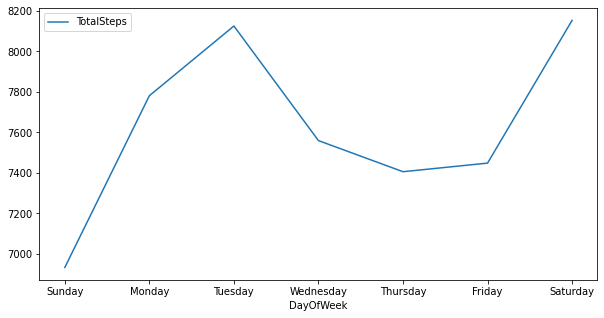

In [156]:
# Examine intensity of activity (by weekday)

# Set index order for days of the week
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

daily_activity.groupby(by='DayOfWeek').mean().reindex(weekday_order).plot(y='TotalSteps', figsize=(10,5));



On average, we see that peak activity occurs on Monday, Tuesday, and Saturday, while dips occur on Sunday, Thursday, Friday. 

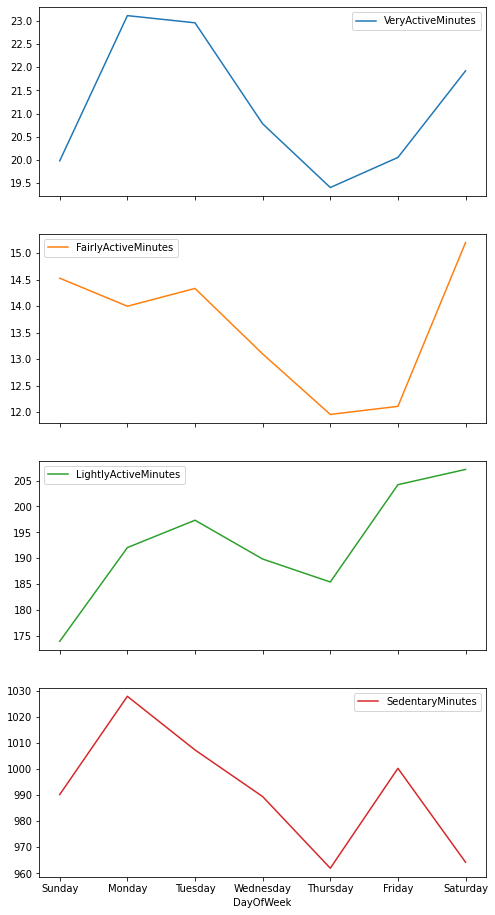

In [175]:
daily_intensity = daily_activity.groupby(by='DayOfWeek').mean().reindex(weekday_order)[['VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

daily_intensity.plot(subplots=True, figsize=(8,16));


By breaking out activity by intensity, we get a more refined picture of usage. There is a relative higher level of `LightlyActiveMinutes` on Thursday and Friday perhaps reflecting individuals that maybe recovering from more strenuous workouts earlier in the week, and opting instead for lower intensity exercise. 

Interetingly we only see `FairlyActiveMinutes` with relative high levels on Sunday suggesting that people might still want to remain active but do not push to the extreme.  


### Hourly Activity

We'll now examine activity by hour.

In [177]:
hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday


In [181]:
# Extract hour of day from 'ActivityHour' and store in new column 'Hour'
hourly_activity['Hour'] = hourly_activity['ActivityHour'].dt.hour

hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek,Hour
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday,4


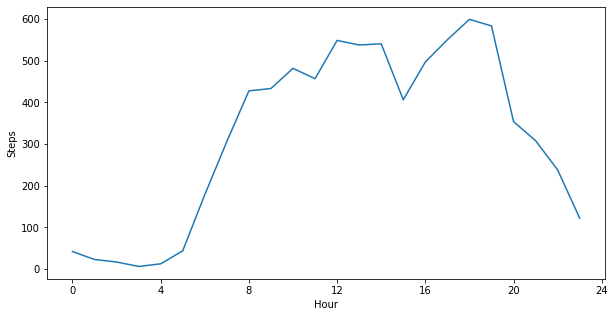

In [191]:
# Plot average activity levels by hour using 'StepTotal'
hourly_activity.groupby(by='Hour')['StepTotal'].mean().plot(xticks=np.arange(0,25,4), figsize=(10,5))
plt.ylabel('Steps');



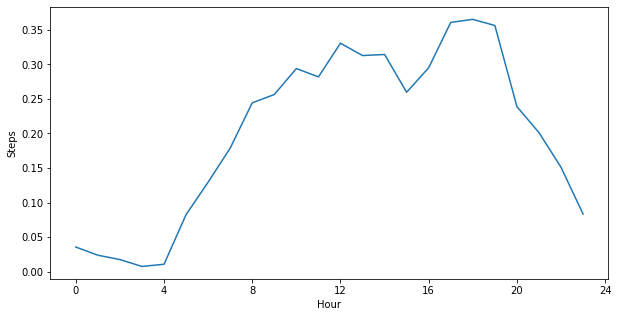

In [192]:
# Plot average activity levels by hour using 'AverageIntensity'

hourly_activity.groupby(by='Hour')['AverageIntensity'].mean().plot(xticks=np.arange(0,25,4), figsize=(10,5))
plt.ylabel('Steps');


We see peak activity occurring between 17:00-19:00 and 12:00-14:00, suggesting that most activity is occurring after work in the early evening and around the typical lunch hour. Least active times not surprisingly occurs from midnight to 4:00 when most people are typically asleep.   

In [201]:
hourly_activity.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories,DayOfWeek,Hour
0,1503960366,2016-04-12 00:00:00,373,20,0.333333,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,8,0.133333,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,7,0.116667,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,0,0.000000,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,0,0.000000,48,Tuesday,4


In [349]:

# Compare activity across the days of the week
hourly_intensity = hourly_activity.groupby(by=['DayOfWeek', 'Hour'])[['StepTotal']].mean()

hourly_intensity.head()

StepTotal
DayOfWeek Hour           
Friday    0     44.277778
          1     19.007937
          2     16.277778
          3     10.801587
          4     14.436508

In [350]:
# Reshape data for plotting by pivoting 'DayOfWeek' from index to column  
hourly_intensity = hourly_intensity.unstack(level=0)
hourly_intensity.head()


StepTotal                                                         \
DayOfWeek     Friday     Monday   Saturday     Sunday   Thursday    Tuesday   
Hour                                                                          
0          44.277778  30.008333  55.203252  82.595041  31.282759  28.346667   
1          19.007937  17.283333  18.877049  52.669421  16.262069  25.540000   
2          16.277778   6.766667  13.573770  49.636364  11.579310  10.686667   
3          10.801587   8.541667   9.475410   4.785124   4.737931   5.706667   
4          14.436508  18.808333  10.032787   5.652893   8.131944  16.966667   

                      
DayOfWeek  Wednesday  
Hour                  
0          31.221477  
1          14.906040  
2          14.476510  
3           2.228188  
4          14.335570

In [351]:
# Remove multi-layer columns 
hourly_intensity.columns = hourly_intensity.columns.droplevel(0)
hourly_intensity.head()

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,44.277778,30.008333,55.203252,82.595041,31.282759,28.346667,31.221477
1,19.007937,17.283333,18.877049,52.669421,16.262069,25.540000,14.906040
2,16.277778,6.766667,13.573770,49.636364,11.579310,10.686667,14.476510
3,10.801587,8.541667,9.475410,4.785124,4.737931,5.706667,2.228188
4,14.436508,18.808333,10.032787,5.652893,8.131944,16.966667,14.335570


In [352]:
# Reorder columns to follow Sunday-thru-Saturday weekday ordering
hourly_intensity.columns = weekday_order
hourly_intensity.head()


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Hour,,,,,,,
0,44.277778,30.008333,55.203252,82.595041,31.282759,28.346667,31.221477
1,19.007937,17.283333,18.877049,52.669421,16.262069,25.540000,14.906040
2,16.277778,6.766667,13.573770,49.636364,11.579310,10.686667,14.476510
3,10.801587,8.541667,9.475410,4.785124,4.737931,5.706667,2.228188
4,14.436508,18.808333,10.032787,5.652893,8.131944,16.966667,14.335570


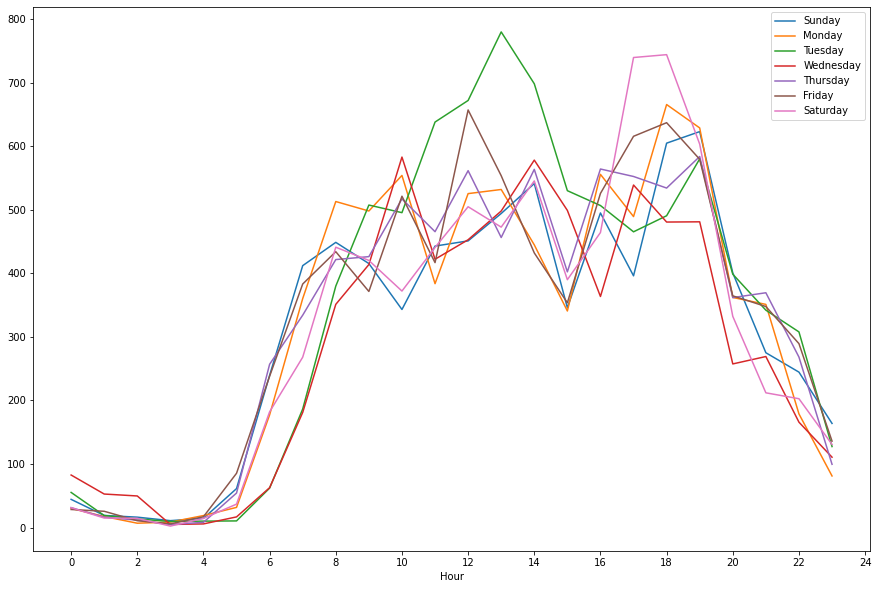

In [356]:
# Compare hourly activity by day of week
hourly_intensity.plot(subplots=False, figsize=(15,10), layout=(7,1), xticks=np.arange(0,25,2));

Hourly activity by day of week appears to follow the general pattern of dual peaks around midday and early evening.

### Sleep Monitoring

Notably we have only 24 out of 33 individuals providing sleep data. Let's explore the data more to see if there any other differences with our physical activity data.

Since it appears that this data is not complete, let's investigate further by finding out how often and when individuals recorded their sleep.

In [358]:
# Find First Sleep Record
sleep_validate = daily_sleep.groupby(by='Id')[['SleepDay']].min()

# Find Last Sleep Record
sleep_validate['Last_Record'] = daily_sleep.groupby(by='Id')[['SleepDay']].max()

# Calculate period of time (days) monitored
sleep_validate['Period_Recorded'] = sleep_validate['Last_Record'] - sleep_validate['SleepDay'] + timedelta(days=1)

# Count number of sleep records per individual
sleep_validate['Number_Records'] = daily_sleep.groupby(by='Id')['TotalMinutesAsleep'].count()

sleep_validate.sort_values(['Number_Records', 'Period_Recorded'], ascending=False)

,SleepDay,Last_Record,Period_Recorded,Number_Records
Id,,,,
8378563200,2016-04-12,2016-05-12,31 days,32
5553957443,2016-04-12,2016-05-12,31 days,31
6962181067,2016-04-12,2016-05-12,31 days,31
2026352035,2016-04-12,2016-05-12,31 days,28
4445114986,2016-04-12,2016-05-12,31 days,28
4702921684,2016-04-12,2016-05-12,31 days,28
3977333714,2016-04-12,2016-05-10,29 days,28
5577150313,2016-04-12,2016-05-11,30 days,26
4319703577,2016-04-14,2016-05-12,29 days,26


Of the individuals that recorded sleep data, roughly half of them recorded their sleep less than 24 times over the 31-day period. This suggests that even among those who chose to monitor their sleep (24 out of the 33 individuals in the dataset), half of them did not consistently take advantage of this capability.  

Perhaps they 1) did not see the benefit in tracking their sleep, or 2) found it difficult to do so. Potential content for marketing, since Bellabeat also has a sleep tracking functionality.

In [361]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


Let's first 

In [130]:
# Last Record


# Number of records

In [ ]:
#### Sleep activity

In [ ]:
#### Sleep vs Activity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load & Inspect Data 

Check for: 
1. Missing/null values 
2. Errors/Typos
3. Duplicates

Validate:
1. Check ranges and stats
2. Check data type
3. 



In [20]:
# Minute Activity Data (Calories & Intensities & METS)

path_5 ='../data/minuteCaloriesNarrow_merged.csv'
path_6 ='../data/minuteIntensitiesNarrow_merged.csv'
path_7 ='../data/minuteMETsNarrow_merged.csv'


min_cal = pd.read_csv(path_5).copy()
min_cal.head()



,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [21]:
min_int = pd.read_csv(path_6).copy()
min_int.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [22]:
min_mets = pd.read_csv(path_7).copy()
min_mets.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [23]:
# Merge minute activity data

act_min = pd.merge(min_cal, min_int, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()


,Id,ActivityMinute,Calories,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [24]:
act_min = pd.merge(act_min, min_mets, how="outer", on=['Id', 'ActivityMinute'])
act_min.head()





,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,10
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0,10
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0,10
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0,10


In [30]:
# Change ActivityMinute to datetime type

act_min['ActivityMinute'] = pd.to_datetime(act_min['ActivityMinute'])

act_min.head()




,Id,ActivityMinute,Calories,Intensity,METs
0,1503960366,2016-04-12 00:00:00,0.7865,0,10
1,1503960366,2016-04-12 00:01:00,0.7865,0,10
2,1503960366,2016-04-12 00:02:00,0.7865,0,10
3,1503960366,2016-04-12 00:03:00,0.7865,0,10
4,1503960366,2016-04-12 00:04:00,0.7865,0,10


In [106]:
act_min.Id.nunique()

33

In [34]:
# Sleep Data

path_8 = '../data/minuteSleep_merged.csv'
path_9 =  '../data/sleepDay_merged.csv'

sleep_min = pd.read_csv(path_8).copy()
sleep_min.head()



,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


In [42]:
sleep_min['date'] = pd.to_datetime(sleep_min['date'])
sleep_min.head()
                                

,Id,date,value,logId
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


In [105]:
# Check number of unique individuals in data
sleep_min.Id.nunique()

24

In [35]:
sleep_day = pd.read_csv(path_9).copy()
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [44]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day.head()                           

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [104]:
# Check how many unique individuals are in data
sleep_day.Id.nunique()

24

In [45]:
# Heart Rate

path_10 = '../data/heartrate_seconds_merged.csv'

heartrate_df = pd.read_csv(path_10).copy()
heartrate_df.head()


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [46]:
heartrate_df['Time'] = pd.to_datetime(heartrate_df['Time'])
heartrate_df.head()

,Id,Time,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [103]:
# Check how many unique individuals are in this data
heartrate_df.Id.nunique()

14

In [47]:
# Weight Log

path_11 = '../data/weightLogInfo_merged.csv'

weight_df = pd.read_csv(path_11).copy()

weight_df.head()



,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [100]:
weight_df['Date'] = pd.to_datetime(weight_df['Date'])

weight_df.head()

weight_df.Id.nunique()

8

## Inspect Features

In [53]:
# Analyze activity throughout the week by using hourly activity broken down by day of week

act_hour['DayOfWeek']=act_hour['ActivityHour'].dt.day_name()
act_hour.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal,DayOfWeek
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,Tuesday
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,Tuesday
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,Tuesday
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,Tuesday
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,Tuesday


## Analyze

Understanding usage:
- Levels of activity throughout the week
- Levels of activity throughout the day
- Levels of intensity for each activity session (suggests type of activity: ie. HIIT, endurance, etc.)

### Levels of throughout the week (by day)

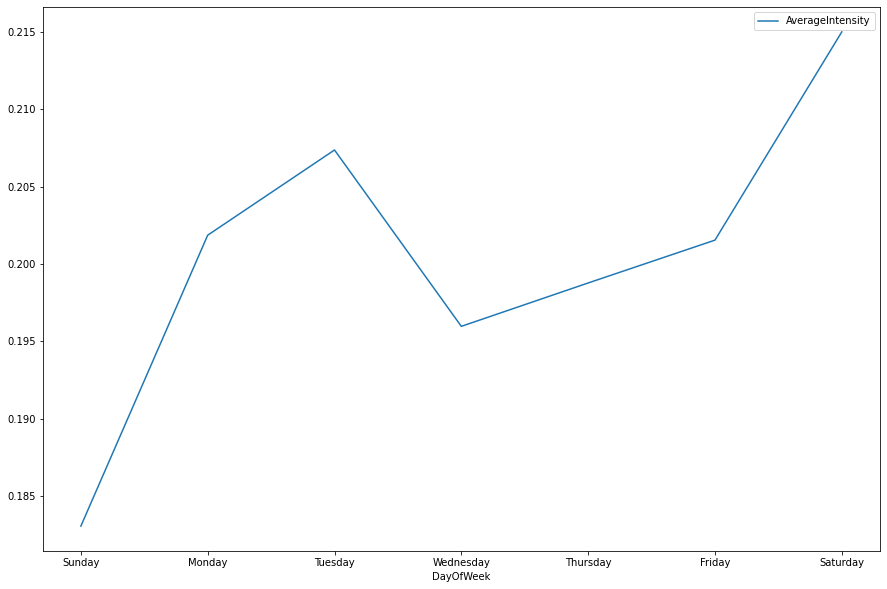

In [87]:
# set order for indexing
weekorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

act_hour.groupby(by="DayOfWeek").mean().reindex(weekorder).plot(y=['AverageIntensity'], figsize=(15,10));
        

Peak days of Activity appear to be Saturday, Tuesday, Monday, Friday (in descending order).

### Levels of activity throughout the day (by hour)

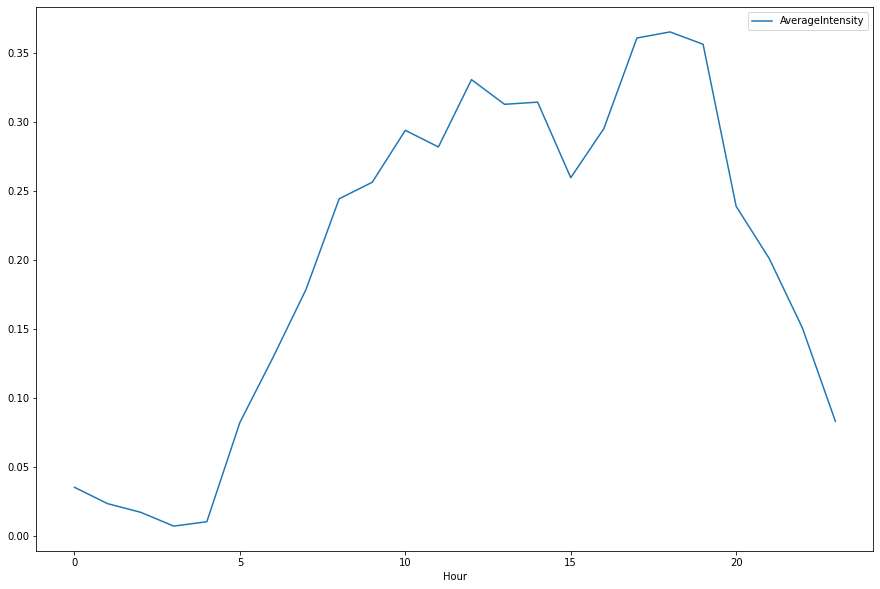

In [91]:
# Extract hour from datetime to understand activity throughout the day

act_hour['Hour'] = act_hour['ActivityHour'].dt.hour

act_hour.groupby(by=['Hour']).mean().plot(y=['AverageIntensity'], figsize=(15,10));


Peak Activity times occur around lunch (11:00-13:00) and after work/dinner (17:00-19:00).

### Levels of Intensity throughout each activity session (by minute)

In [93]:
act_min.describe()

,Id,Calories,Intensity,METs
count,1.325580e+06,1.325580e+06,1.325580e+06,1.325580e+06
mean,4.847898e+09,1.623130e+00,2.005937e-01,1.469001e+01
std,2.422313e+09,1.410447e+00,5.190227e-01,1.205541e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,9.357000e-01,0.000000e+00,1.000000e+01
50%,4.445115e+09,1.217600e+00,0.000000e+00,1.000000e+01
75%,6.962181e+09,1.432700e+00,0.000000e+00,1.100000e+01
max,8.877689e+09,1.974995e+01,3.000000e+00,1.570000e+02


In [94]:
act_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325580 entries, 0 to 1325579
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  int64         
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   Calories        1325580 non-null  float64       
 3   Intensity       1325580 non-null  int64         
 4   METs            1325580 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 60.7 MB


In [96]:
#Extract Minute from datetime

act_min['Minute'] = act_min['ActivityMinute'].dt.minute
act_min.head()

,Id,ActivityMinute,Calories,Intensity,METs,Minute
0,1503960366,2016-04-12 00:00:00,0.7865,0,10,0
1,1503960366,2016-04-12 00:01:00,0.7865,0,10,1
2,1503960366,2016-04-12 00:02:00,0.7865,0,10,2
3,1503960366,2016-04-12 00:03:00,0.7865,0,10,3
4,1503960366,2016-04-12 00:04:00,0.7865,0,10,4


## Correlations

### Sleep vs Activity

In [113]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [117]:
# Because Sleep data only contains 24 individuals, we'll limit analysis on our Activity data to those same individuals
# Data from 2016-04-12 to 2016-05-12
sleep_day['SleepDay'].describe(datetime_is_numeric=True)


count                              413
mean     2016-04-26 12:40:05.811137792
min                2016-04-12 00:00:00
25%                2016-04-19 00:00:00
50%                2016-04-27 00:00:00
75%                2016-05-04 00:00:00
max                2016-05-12 00:00:00
Name: SleepDay, dtype: object

In [151]:
# Find First Sleep Record
sleep_validate = sleep_day.groupby(by='Id')[['SleepDay']].min()

# Find Last Sleep Record
sleep_validate['Last_Record'] = sleep_day.groupby(by='Id')[['SleepDay']].max()

# Calculate period of time (days) monitored
sleep_validate['Period_Recorded'] = sleep_validate['Last_Record'] - sleep_validate['SleepDay']

# Count number of sleep records per individual
sleep_validate['Number_Records'] = sleep_day.groupby(by='Id')['TotalMinutesAsleep'].count()

sleep_validate.sort_values(['Number_Records', 'Period_Recorded'], ascending=False)

,SleepDay,Last_Record,Period_Recorded,Number_Records
Id,,,,
8378563200,2016-04-12,2016-05-12,30 days,32
5553957443,2016-04-12,2016-05-12,30 days,31
6962181067,2016-04-12,2016-05-12,30 days,31
2026352035,2016-04-12,2016-05-12,30 days,28
4445114986,2016-04-12,2016-05-12,30 days,28
4702921684,2016-04-12,2016-05-12,30 days,28
3977333714,2016-04-12,2016-05-10,28 days,28
5577150313,2016-04-12,2016-05-11,29 days,26
4319703577,2016-04-14,2016-05-12,28 days,26


Of the 24 individuals that recorded sleep data, roughly half had fewer than 24 records over a 30 day period. In order to use data with sufficient data for comparison, we'll only retain data from the 12 individuals with at least 24 records taken over more than 26 days. 

In [158]:
# Reducing Sleep Data to individuals with sufficient number of records

sleep_ids = sleep_validate[sleep_validate['Number_Records'] >= 24].index.values.astype(int)
sleep_ids



array([1503960366, 2026352035, 3977333714, 4319703577, 4388161847,
       4445114986, 4702921684, 5553957443, 5577150313, 6962181067,
       7086361926, 8378563200])

In [160]:
# create a mask to filter out individuals that aren't part of the 12-person sleep data
mask = df['Id'].isin(sleep_ids)
mask

0       True
1       True
2       True
3       True
4       True
       ...  
935    False
936    False
937    False
938    False
939    False
Name: Id, Length: 940, dtype: bool

In [170]:
# Filtered the Daily Activity Data with mask (only 12 individuals)
act_daily_12 = df[mask]
act_daily_12

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.000000,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.000000,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.000000,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.000000,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.000000,2.71,0.41,5.04,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,8378563200,2016-05-08,2943,2.33,2.33,0.000000,0.00,0.00,2.33,0.0,0,0,139,621,2685
845,8378563200,2016-05-09,8382,6.65,6.65,2.092147,1.27,0.66,4.72,0.0,71,13,171,772,3721
846,8378563200,2016-05-10,6582,5.22,5.22,2.253081,0.66,0.64,3.92,0.0,63,13,152,840,3586
847,8378563200,2016-05-11,9143,7.25,7.25,2.092147,1.39,0.59,5.27,0.0,72,10,184,763,3788


In [168]:
# Filter sleep data for the 12 individuals

mask_2 = sleep_day['Id'].isin(sleep_ids)
mask_2


0       True
1       True
2       True
3       True
4       True
       ...  
408    False
409    False
410    False
411    False
412    False
Name: Id, Length: 413, dtype: bool

In [174]:
sleep_day_12 = sleep_day[mask_2]
sleep_day_12

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,First_Record
0,1503960366,2016-04-12,1,327,346,NaT
1,1503960366,2016-04-13,2,384,407,NaT
2,1503960366,2016-04-15,1,412,442,NaT
3,1503960366,2016-04-16,2,340,367,NaT
4,1503960366,2016-04-17,1,700,712,NaT
...,...,...,...,...,...,...
393,8378563200,2016-05-08,1,545,606,NaT
394,8378563200,2016-05-09,1,359,399,NaT
395,8378563200,2016-05-10,1,342,391,NaT
396,8378563200,2016-05-11,1,368,387,NaT


In [166]:
# Now find correlations between daily activity and sleep among these 12 individuals

act_daily_12 

sleep_day_12



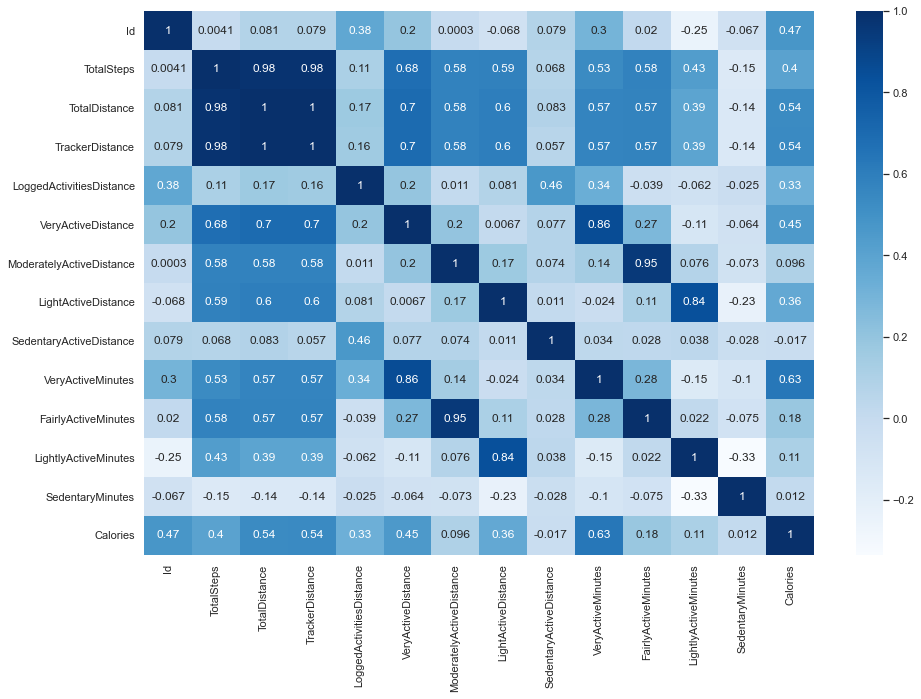

In [175]:
plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = act_daily_12.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues')


In [178]:
act_daily_12.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [180]:
sleep_day_12.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,First_Record
0,1503960366,2016-04-12,1,327,346,NaT
1,1503960366,2016-04-13,2,384,407,NaT
2,1503960366,2016-04-15,1,412,442,NaT
3,1503960366,2016-04-16,2,340,367,NaT
4,1503960366,2016-04-17,1,700,712,NaT


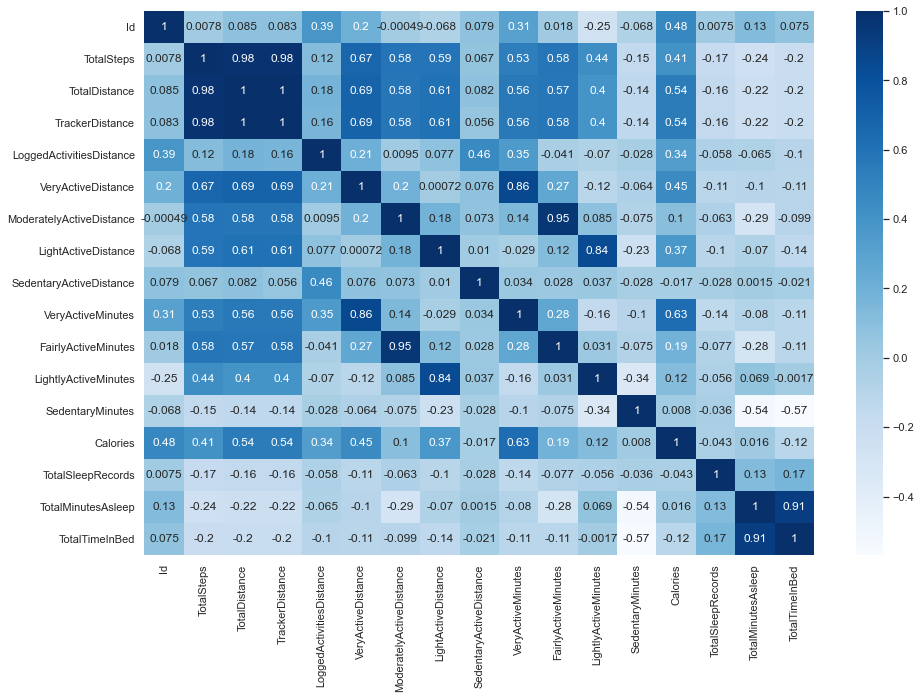

In [185]:
# merge activity and sleep dataframes
act_sleep = pd.merge(act_daily_12, sleep_day_12, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

plt.figure(figsize=(15,10))
sns.set_theme(style='white')
corr = act_sleep.corr()
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)
heatmap;


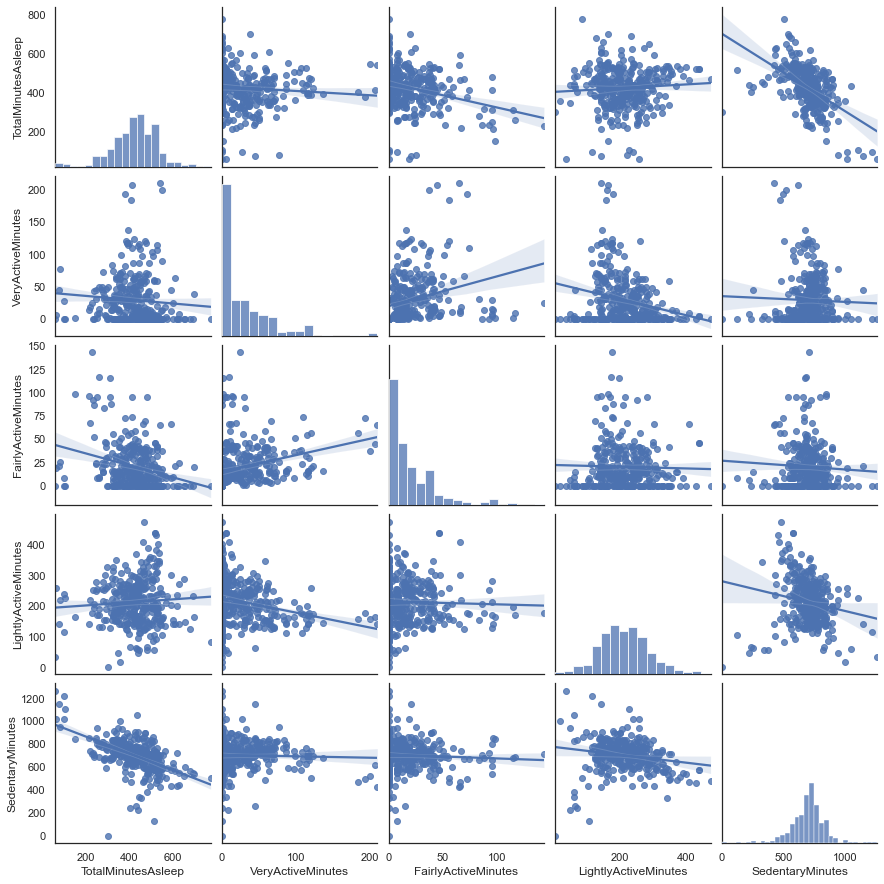

In [195]:
# Focus on relationship between total minutes asleep and activity levels in minutes
act_sleep_min = act_sleep[['TotalMinutesAsleep', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
act_sleep_min.head()

# Exclude Null Rows in Sleep Data
act_sleep_min_clean = act_sleep_min[act_sleep_min['TotalMinutesAsleep'].notna()]

# Pairplot

sns.pairplot(act_sleep_min_clean, kind='reg');


In [99]:
# Export compiled dataframes as csv for Tableau 
path_10 = '../data/act_min_tableau.csv'
path_11 = '../data/act_hour_tableau.csv'
path_12 = '../data/act_daily_tableau.csv'

act_min.to_csv(path_10, index=False)
act_hour.to_csv(path_11, index=False)
df.to_csv(path_12, index=False)

# SHARE | Recommendations

Caveats:

Marketing strategy

Fitbit and Bellabeat have slightly different target audiences: Fitbit is more sporty while Bellabeat is focused on women who care about health and fashion (smart jewlery)